In [1]:
# Print the Python version.
from platform import python_version
print(python_version())

3.7.2


# 1. Wrangling Data

## 1.1 Gathering Data

In [2]:
# Import numpy, pandas, matplotlip.pyplot and seaborn.
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
# Load the dataset.
df = pd.read_csv('developer_survey_2019/survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


## 1.2 Assessing Data

### Issue 1: There are missing values in the 'UndergradMajor' column.

In [4]:
df.UndergradMajor.head()

0                                                  NaN
1                                                  NaN
2                        Web development or web design
3    Computer science, computer engineering, or sof...
4    Computer science, computer engineering, or sof...
Name: UndergradMajor, dtype: object

In [5]:
df.UndergradMajor.isnull().sum()

13269

### Issue 2: The values of 'LanguageDesireNextYear' column need to be splitted over multiple columns. 

In [6]:
df.LanguageDesireNextYear.head()

0    C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL
1                        C++;HTML/CSS;JavaScript;SQL
2                                    Elixir;HTML/CSS
3                                C;C#;JavaScript;SQL
4           HTML/CSS;Java;JavaScript;SQL;WebAssembly
Name: LanguageDesireNextYear, dtype: object

## 1.3 Cleaning Data

### Issue 1: There are missing values in the 'UndergradMajor' column.

In [7]:
# Exclude the individuals with missing values in the 'UndergradMajor' column.
df = df[~df.UndergradMajor.isnull()]

# Create new column 'HealthMajor' based on the values of the 'UndergradMajor' column.
df['HealthMajor'] = [True if x == 'A health science (ex. nursing, pharmacy, radiology)' else False 
               for x in df.UndergradMajor]

In [8]:
df.HealthMajor.value_counts()

False    75291
True       323
Name: HealthMajor, dtype: int64

### Issue 2: The values of 'LanguageDesireNextYear' column need to be splitted over multiple columns. 

In [9]:
# Define the needed functions. 

def get_language(text,language):
    '''
    The function returns True if the language is in the text and False otherwise. 
    Inputs: text (str) and language (str)
    '''
    if language in str(text):
        return 1
    else: 
        return 0
    
def split_values(data,column,split=';',suffix=""):
    '''
    The function splits a data column into multiple columns on the split character and returns a
    list containing the names of the newly created columns. The suffix characters will be added 
    to the columns' names. 
    Inputs: data (pandas DataFrame), column (str), split (optional str), and suffix (optinal str)
    '''
    values = []
    for i in data[column].unique():
        values +=(str(i).split(split))
    values = list(set(values))
    for i in range(len(values)): 
        data[values[i]+suffix] = data[column].apply(get_language,language=values[i])
        values[i]+= suffix
    return values

In [10]:
# Split the values of the 'LanguageDesireNextYear' and print the newly formed columns. 
split_values(data=df,column='LanguageDesireNextYear',suffix='')

['Elixir',
 'Rust',
 'Objective-C',
 'Java',
 'WebAssembly',
 'C',
 'PHP',
 'Python',
 'C++',
 'nan',
 'Swift',
 'Erlang',
 'R',
 'Ruby',
 'VBA',
 'HTML/CSS',
 'Bash/Shell/PowerShell',
 'Go',
 'JavaScript',
 'F#',
 'Dart',
 'Assembly',
 'C#',
 'SQL',
 'TypeScript',
 'Scala',
 'Other(s):',
 'Kotlin',
 'Clojure']

# 2. Analysing Data

## 2.1 What is the percentage of  developers who have a major in health science?

In [11]:
print('The percentage of OverStack coders who have a health major is {}%.'.format(
            round(len(df[df.HealthMajor==True]) /
            len(df)*100,2)))

The percentage of OverStack coders who have a health major is 0.43%.


## 2.2. What are the salary averages of developers with a health science major and the rest of the developers? 

In [12]:
# Describe the values of the 'ConvertedComp' column grouped by the 'HealthMajor' 
    # column of the full-time employed individuals. 
df[df.Employment=='Employed full-time'].groupby('HealthMajor').ConvertedComp.describe()

,count,mean,std,min,25%,50%,75%,max
HealthMajor,,,,,,,,
False,45429.0,134027.887583,295664.907964,0.0,28644.0,59712.0,102300.00,2000000.0
True,122.0,191788.418033,441781.439436,0.0,32307.0,59211.0,104529.25,2000000.0


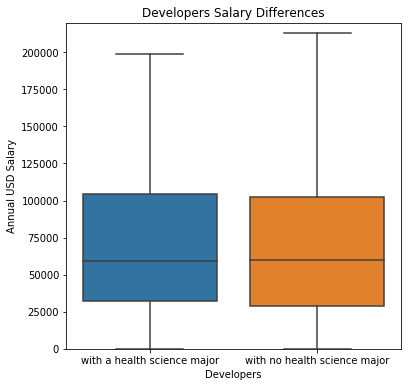

In [13]:
# Specify a figure size. 
plt.figure(figsize=(6,6))
# Plot a boxplot using seaborn. 
sns.boxplot(data=df[df.Employment=='Employed full-time'],x="HealthMajor",y='ConvertedComp',fliersize=0,order=[True,False])
# Fix the the title, labels, and ticks 
plt.title('Developers Salary Differences')
plt.xlabel('Developers')
plt.xticks(range(2),['with a health science major','with no health science major'])
plt.ylabel('Annual USD Salary')
# Limit the y axis values. 
plt.ylim(0,220000);

## 2.3 Which programming or scripting languages do health science major developers want to work in over the next year? 

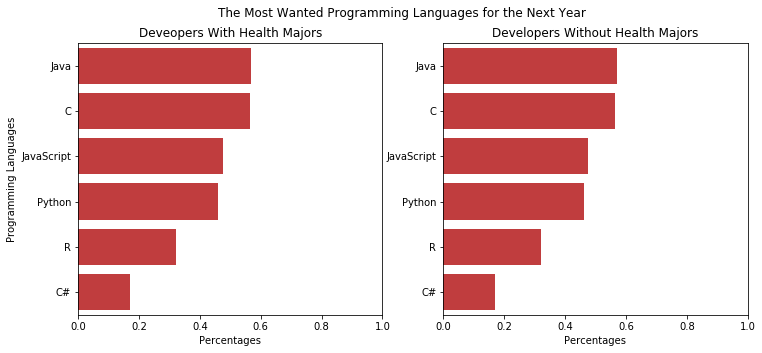

In [14]:
# Define a varaible containing the langauges names.
languages = ['Java','JavaScript','C#','Python','R','C']
# Choose a color for the bars.
color = sns.color_palette()[3]

# Plot two bar plots.
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x=df[df.HealthMajor==True].loc[:,languages].mean().sort_values(ascending=False)[:11],
    y=df[df.HealthMajor==True].loc[:,languages].mean().sort_values(ascending=False)[:11].index,
           color=color)
plt.title('Deveopers With Health Majors')
plt.xlim(0,1)
plt.ylabel('Programming Languages')
plt.xlabel('Percentages')
plt.subplot(1,2,2)
sns.barplot(x=df[df.HealthMajor!=False].loc[:,languages].mean().sort_values(ascending=False)[:11],
    y=df[df.HealthMajor!=False].loc[:,languages].mean().sort_values(ascending=False)[:11].index,
           color=color)
plt.xlim(0,1)
plt.xlabel('Percentages')
plt.title('Developers Without Health Majors')
plt.suptitle("The Most Wanted Programming Languages for the Next Year");